In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#●Load the dataset into a DataFrame or equivalent data structure.
data = pd.read_csv(r"C:\Users\hp\Downloads\EDA1\EDA1\Cardiotocographic.csv")
data.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [3]:
#●Handle missing values appropriately (e.g., imputation, deletion)
data.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [4]:
data.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [5]:
# Loop through numerical columns and fill missing values with the column mean
for col in data.columns:
    if data[col].dtype in [np.float64, np.int64]:  # Only apply to numeric columns
        mean_val = data[col].mean()
        data[col] = data[col].fillna(mean_val)

In [6]:
data.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [7]:
data

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


●Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).

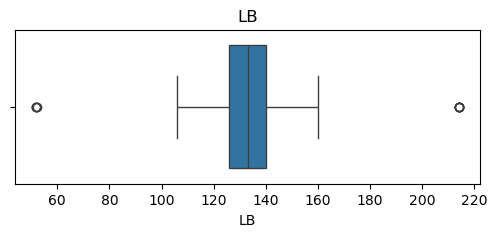

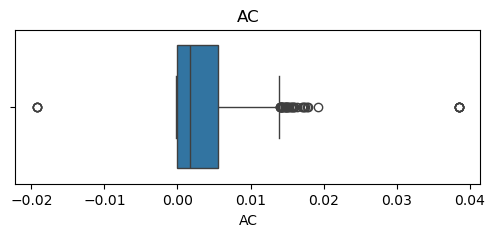

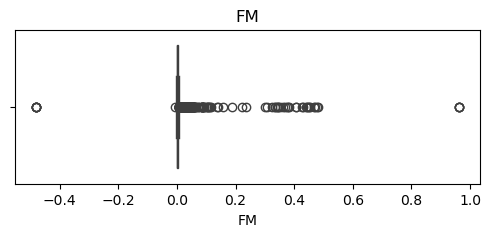

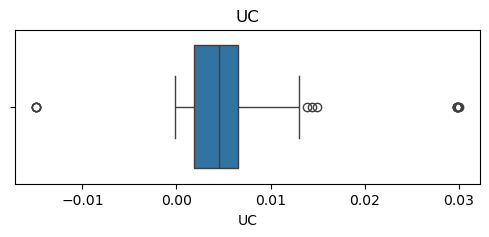

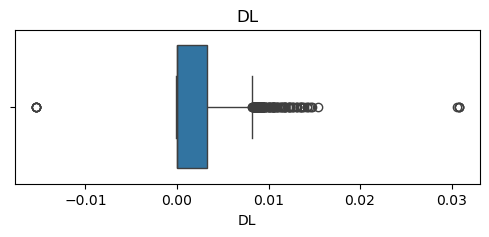

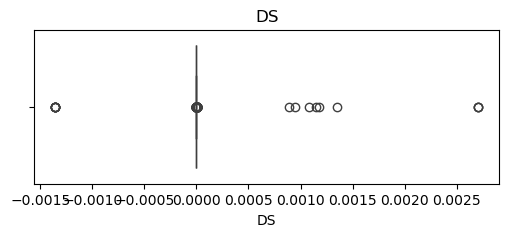

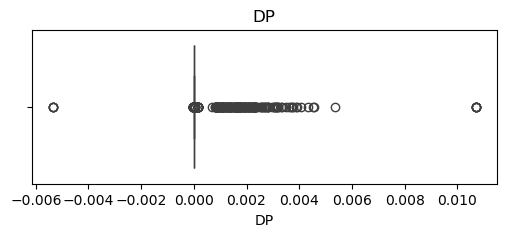

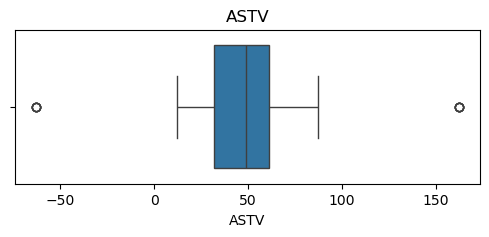

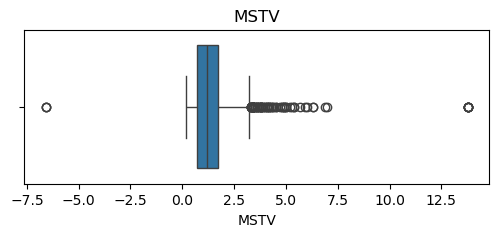

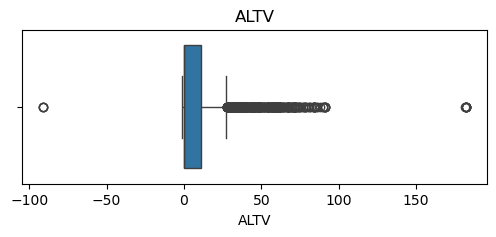

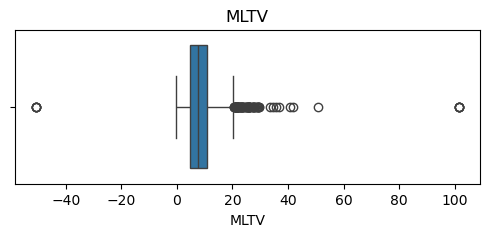

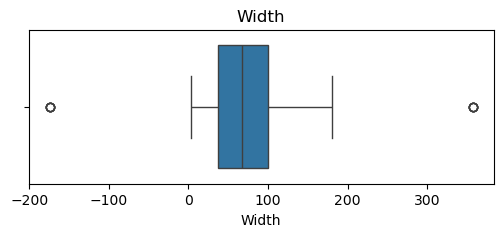

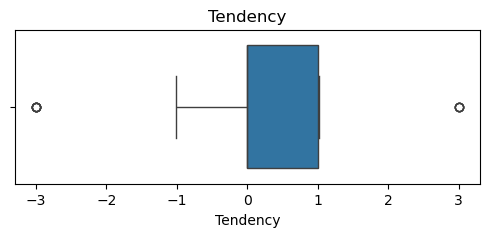

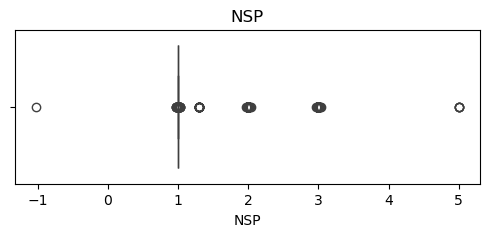

In [ ]:
# Boxplot for all numeric columns
for col in data.select_dtypes(include=[np.number]):
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=data[col])
    plt.title(col)
    plt.show()


In [11]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

data_clean = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]


In [12]:
# Statistical summary
summary = data.describe().T
summary['median'] = data.median()
summary['IQR'] = Q3 - Q1
print(summary)


           count        mean        std         min         25%         50%  \
LB        2126.0  133.343598  11.214328   51.842487  126.000000  133.000000   
AC        2126.0    0.003219   0.004370   -0.019284    0.000000    0.001668   
FM        2126.0    0.009894   0.067540   -0.480634    0.000000    0.000000   
UC        2126.0    0.004391   0.003340   -0.014925    0.001851    0.004484   
DL        2126.0    0.001895   0.003343   -0.015393    0.000000    0.000000   
DS        2126.0    0.000003   0.000141   -0.001353    0.000000    0.000000   
DP        2126.0    0.000175   0.000836   -0.005348    0.000000    0.000000   
ASTV      2126.0   46.995984  18.813973  -63.000000   32.000000   49.000000   
MSTV      2126.0    1.364378   1.173632   -6.600000    0.700000    1.200000   
ALTV      2126.0   10.285964  21.205041  -91.000000    0.000000    0.000000   
MLTV      2126.0    8.284887   7.734356  -50.700000    4.600000    7.500000   
Width     2126.0   70.429260  42.719161 -174.000000 

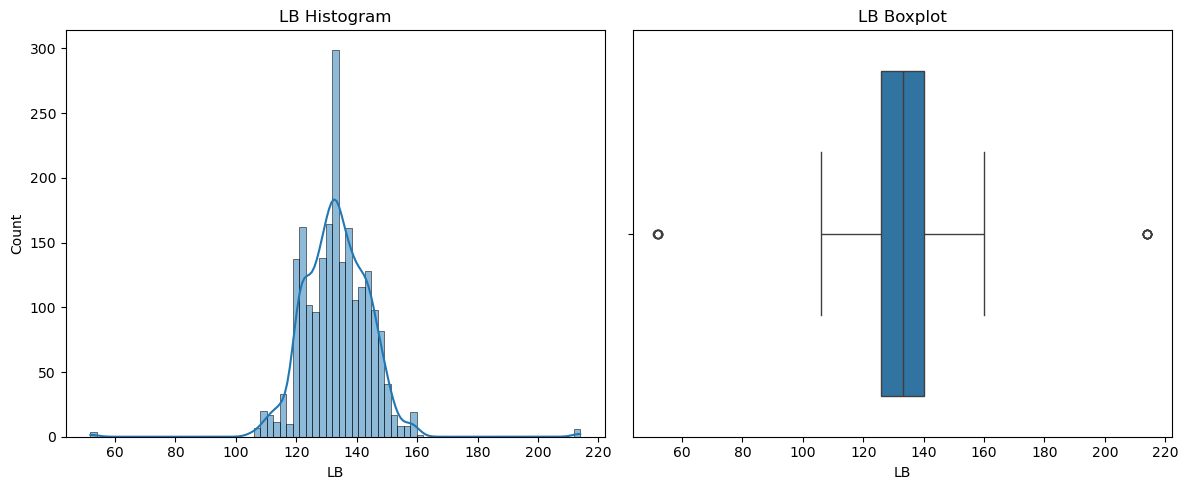

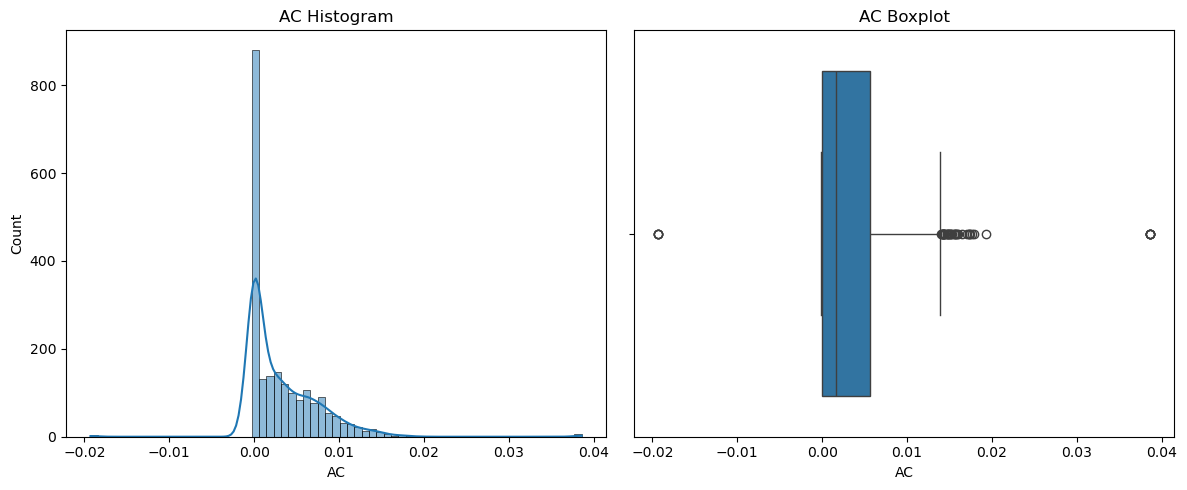

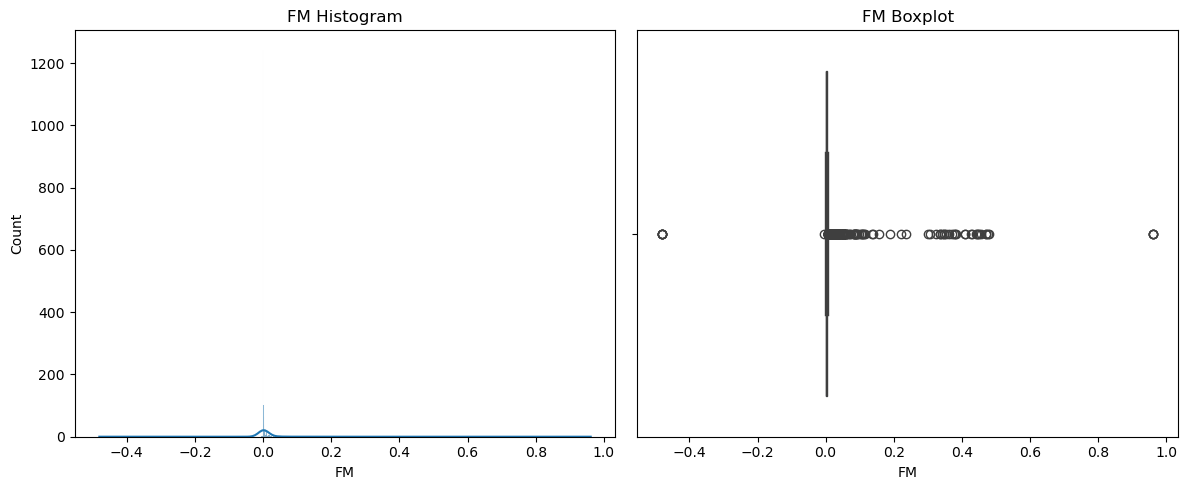

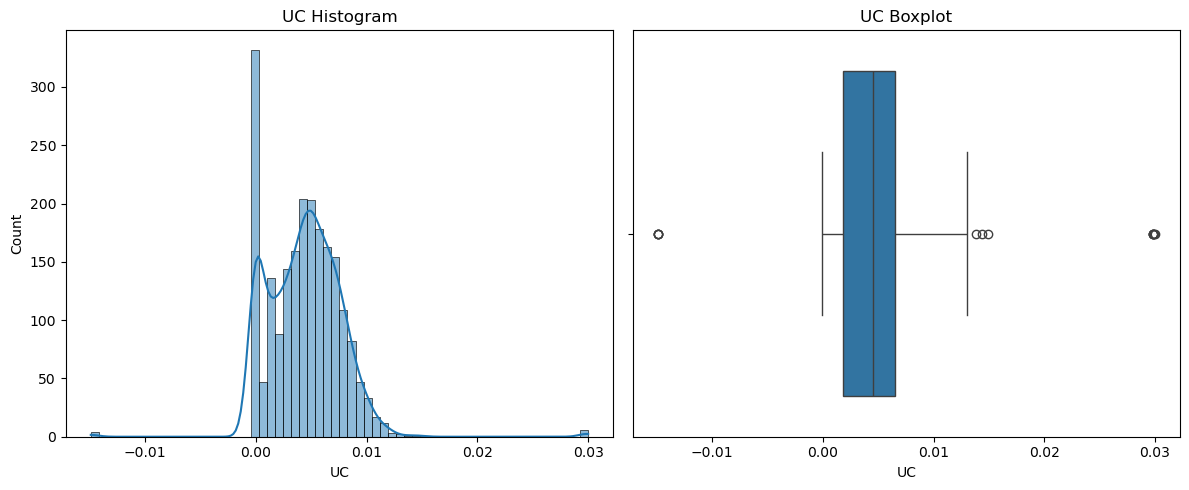

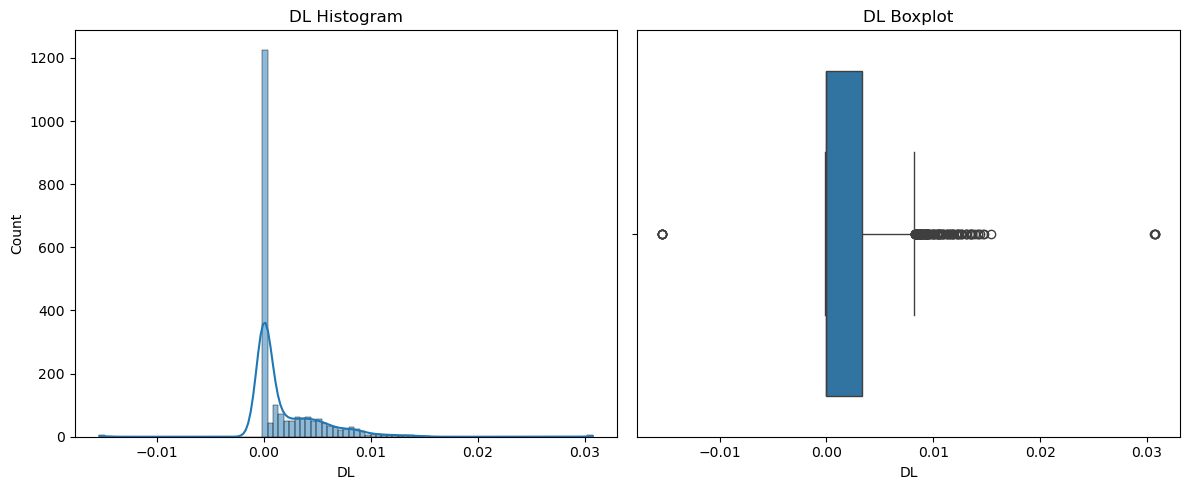

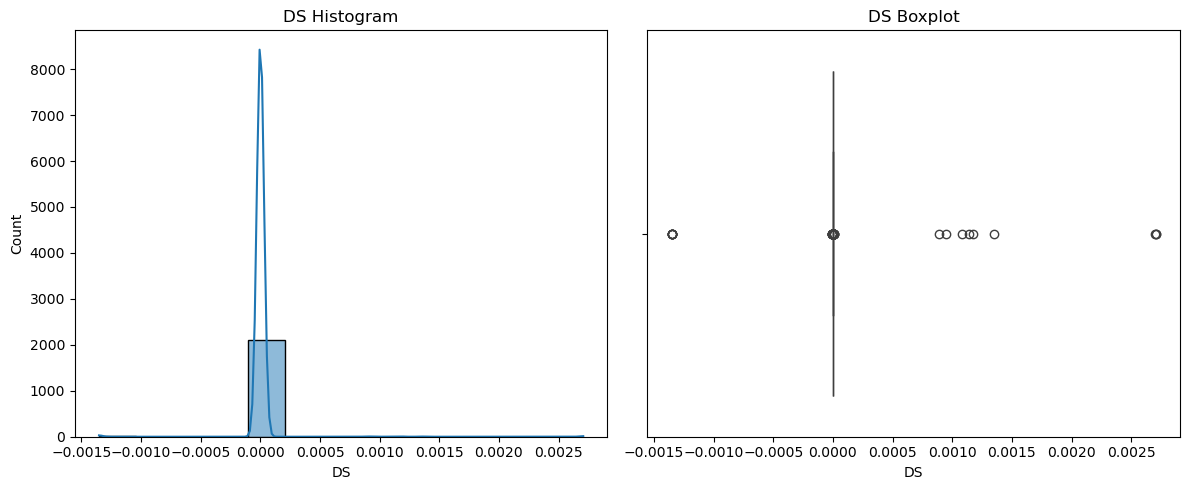

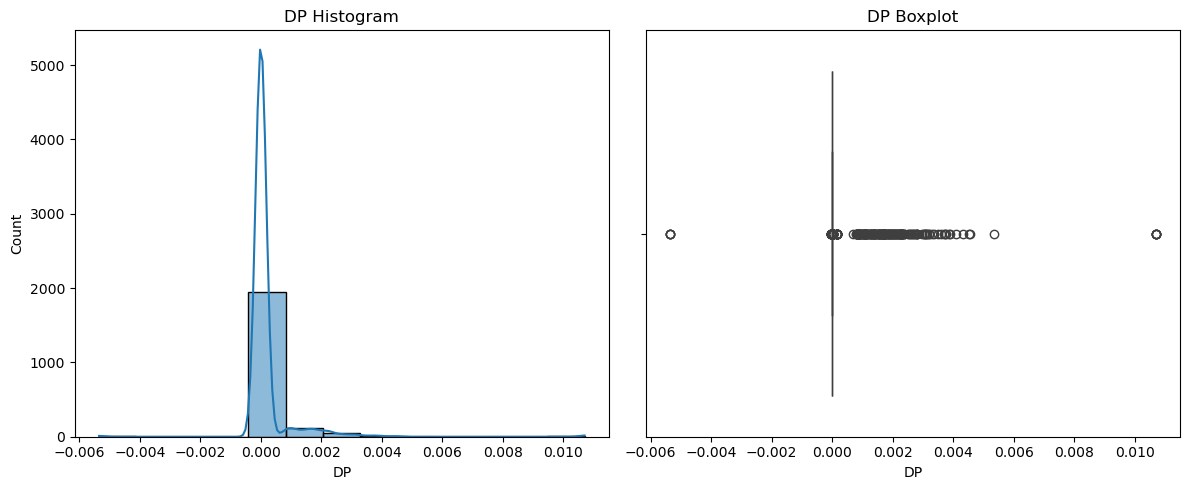

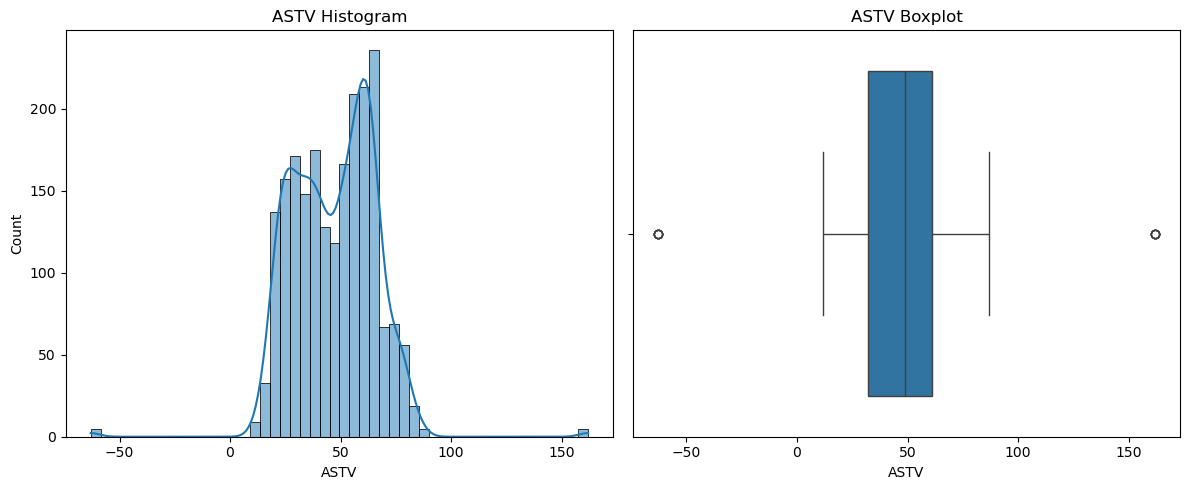

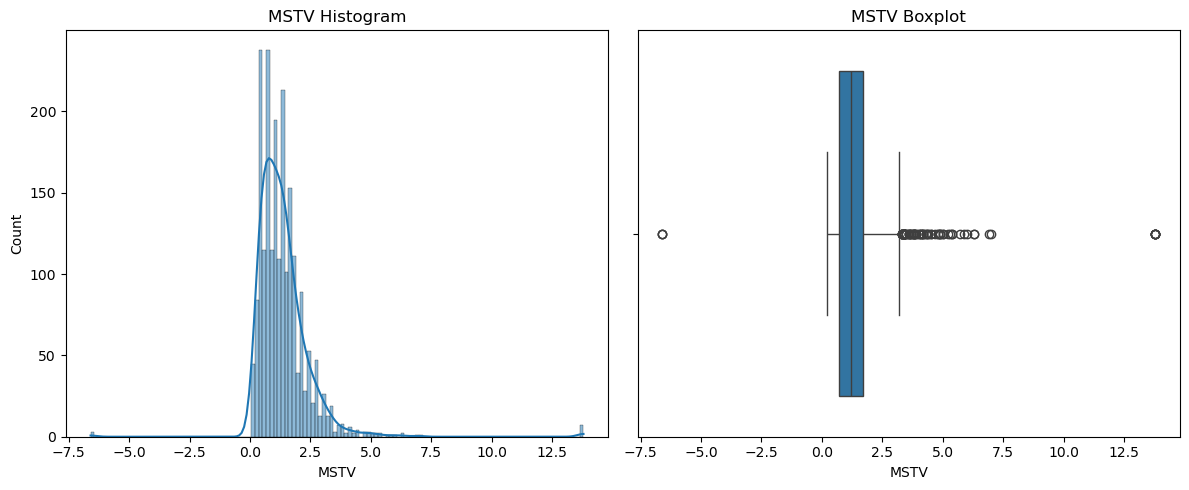

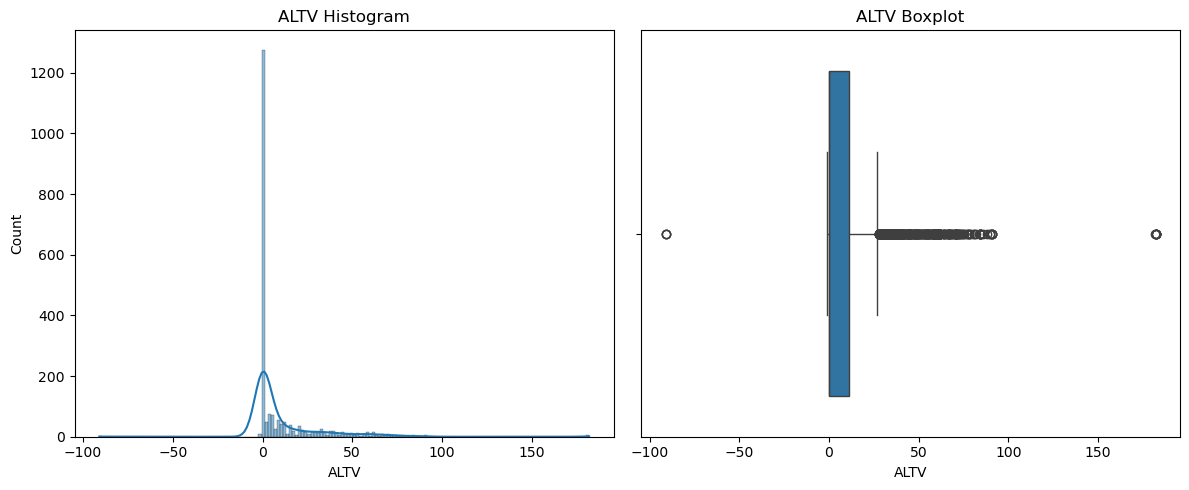

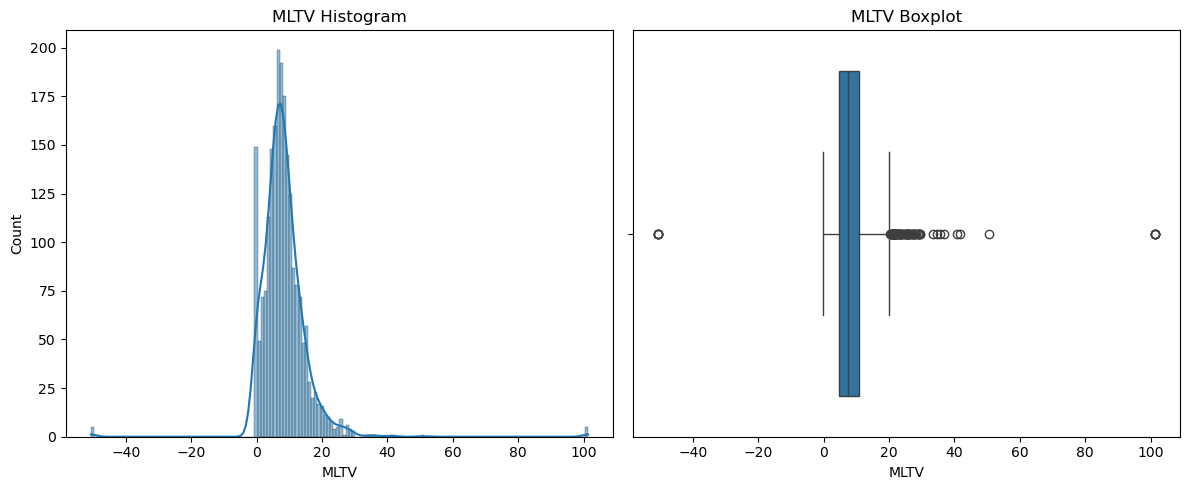

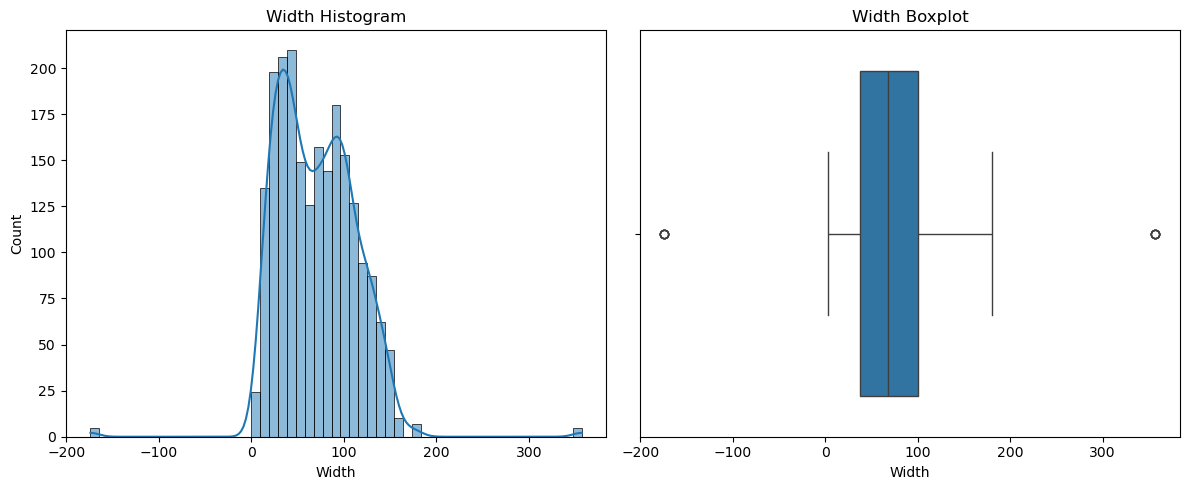

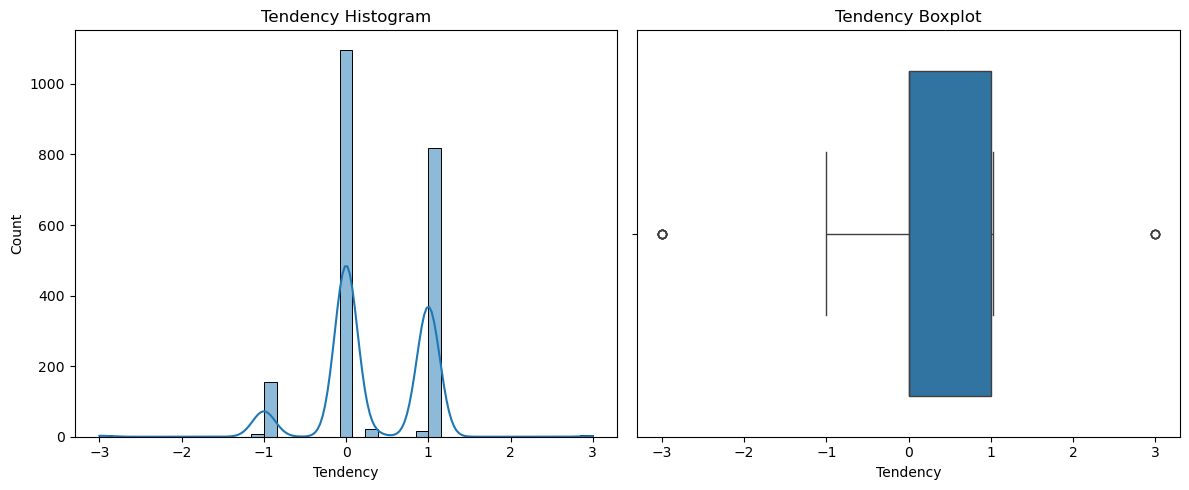

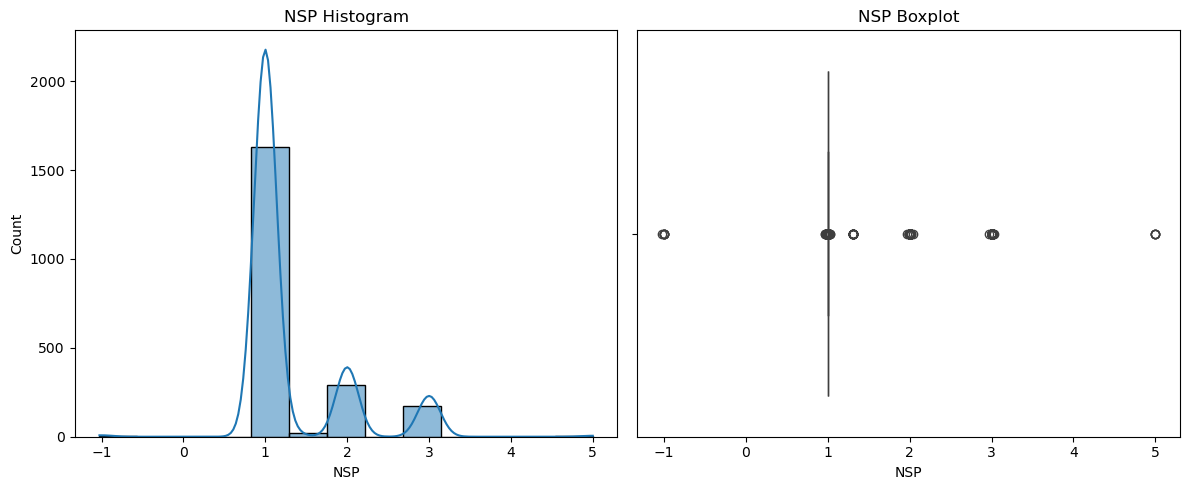

In [13]:
# Histograms and Boxplots
for col in data.columns:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'{col} Histogram')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.title(f'{col} Boxplot')
    plt.tight_layout()
    plt.show()


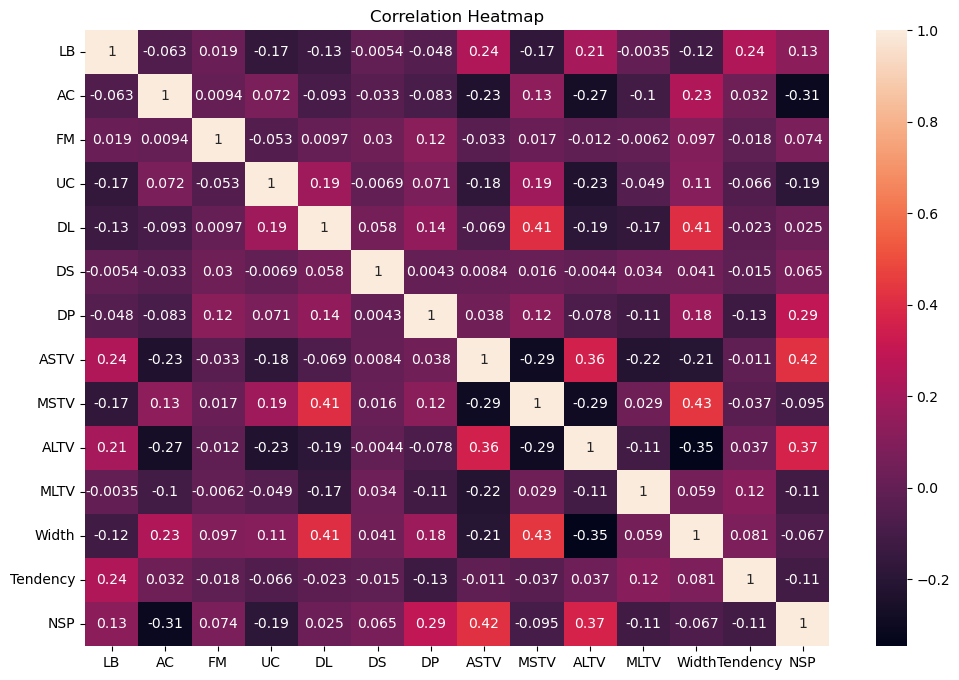

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

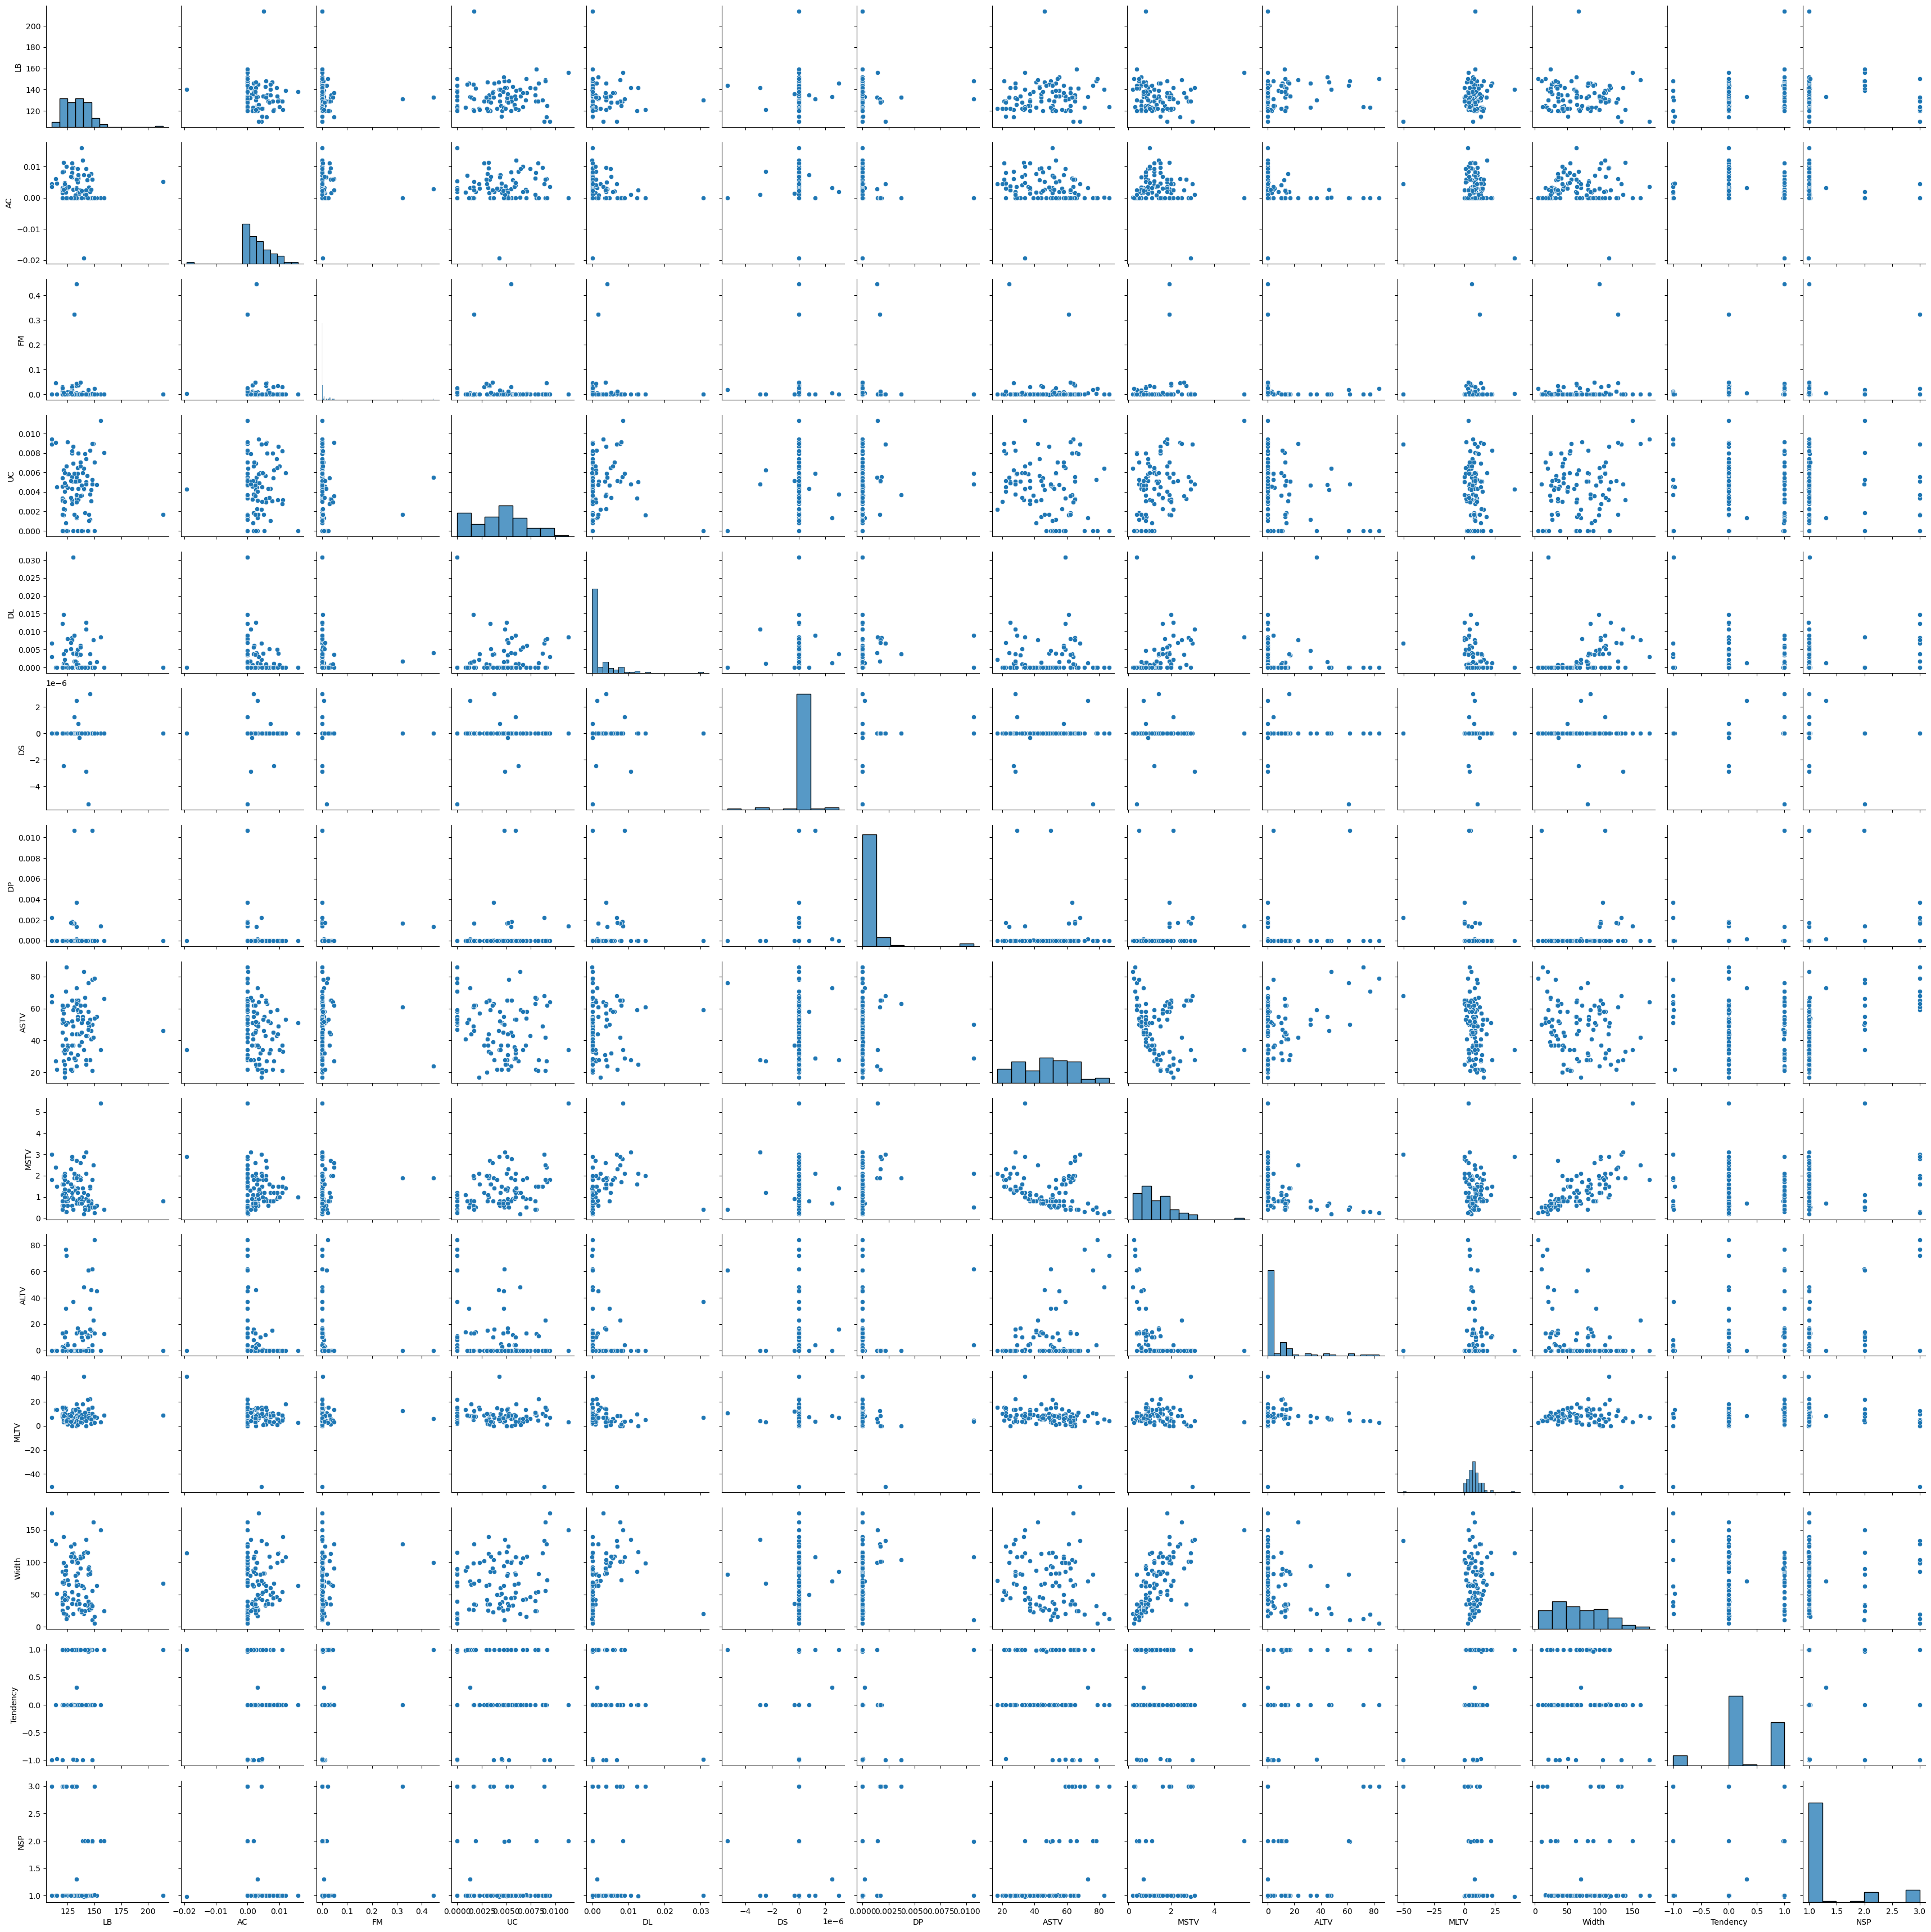

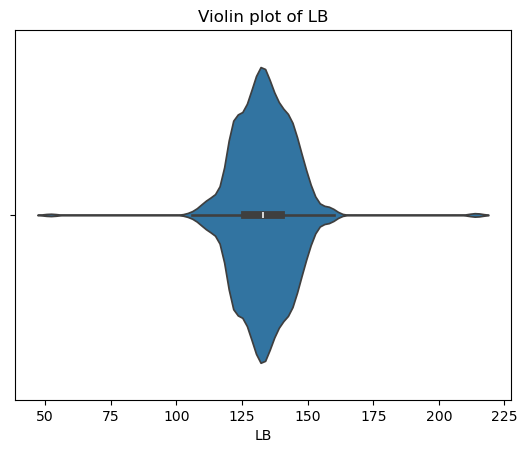

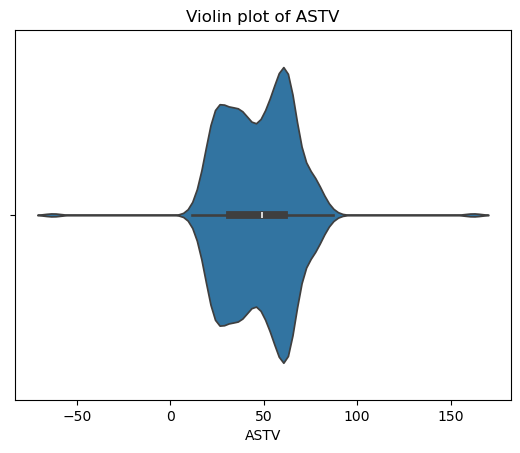

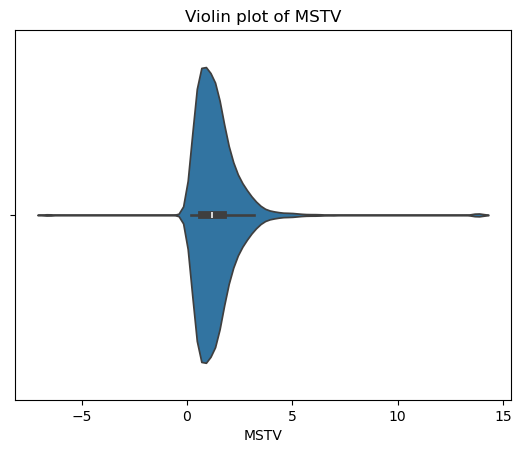

In [19]:
# Pairplot
sns.pairplot(data.sample(100))  # use sample to avoid heavy plotting
plt.show()

# Violin plot (example on 3 features)
for col in ['LB', 'ASTV', 'MSTV']:
    sns.violinplot(x=data[col])
    plt.title(f'Violin plot of {col}')
    plt.show()


In [21]:
# Find strongest correlations
correlations = data.corr().unstack().sort_values(ascending=False)
strong_pairs = correlations[(correlations < 1) & (correlations > 0.7)]
print("Strong correlations:\n", strong_pairs)

Strong correlations:
 Series([], dtype: float64)


In [ ]:
### Key Insights and Recommendations

- **Variability Metrics (ASTV, ALTV)** show significant spread, potentially indicating cases of fetal distress.
- **Correlations**: `UC` (Uterine Contractions) negatively correlates with `LB` (Baseline FHR), supporting medical observations.
- **Outliers** were noted in `DL` and `DP`, which may warrant further clinical investigation.

### Recommendations

- Consider applying PCA or clustering for pattern detection.
- Medical experts can use abnormal variability patterns as early warning signals.